
# New OANDA API

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
from datetime import datetime
from PIL import Image
import matplotlib.image as mpimg
import sys
sys.path.append("../")
from trading.api.oanda_api import OandaApi

In [11]:
def get_data(instrument):
     
    api = OandaApi("../../config/oanda.cfg")
    dataframe = api.get_price_candles(instrument, 50)
    dataframe["Close"] = dataframe[instrument]
#     dataframe['time'] = dataframe['time'].apply(mpl_dates.date2num)
    return dataframe

#This function get the MACD as well as the signal
#dataframe is the data we have. "Close" price is required
def get_MACD(dataframe):
    dataframe['ema12'] = np.NAN
    dataframe['ema26'] = np.NAN
    dataframe['ema12'] = dataframe['Close'].ewm(span=12, adjust=False).mean()
    dataframe['ema26'] = dataframe['Close'].ewm(span=26, adjust=False).mean()
    macd = dataframe['ema12'] - dataframe['ema26']
    signal = macd.ewm(span=9, adjust=False).mean()
    dataframe["MACD"] = macd
    dataframe["MACD_SIGNAL"] = signal
    return dataframe

#This function get the Buy and sell signals using the MACD indicator
#dataframe is the data we have. "MACD"  and "MACD_SIGNAL" values are required
def get_MACD_signals(dataframe):
    signals = np.where(dataframe["MACD"] > dataframe["MACD_SIGNAL"], 1, -1)
    signals = np.where(dataframe["MACD"].isnull(), 0, signals)
    
    print(signals)
        
    signals_list = [signals[0]]
    print()
    print(signals_list)
    
    for i in range(1, len(signals)):
        if signals[i] == signals[i -1]:
            signals_list.append(0)
        else:
            signals_list.append(signals[i])
    dates_bought = list()
    dates_sold = list()
    dataframe["Buy"] = np.NAN
    dataframe["Sell"] = np.NAN
    for i in range(0, len(dataframe)):
        if signals_list[i] == 1:
            dates_bought.append(dataframe.index[i])
            dataframe["Buy"][i] = dataframe["Close"][i]
        elif signals_list[i] == -1:
            dates_sold.append(dataframe.index[i])
            dataframe["Sell"][i] = dataframe["Close"][i]
        
    return dataframe

In [3]:
symbol = "EUR_GBP"
df = get_data(symbol)


In [12]:
df = get_MACD(df)


In [8]:
df = get_MACD_signals(df)

[-1 -1 -1 ...  1  1  1]

[-1]


In [9]:
df

,EUR_USD,bid,ask,Close,ema100,ema200,MACD,MACD_SIGNAL,Buy,Sell
time,,,,,,,,,,
2024-02-04 22:03:00,1.07861,1.07849,1.07873,1.07861,1.078610,1.078610,0.000000,0.000000,NaN,1.07861
2024-02-04 22:03:30,1.07831,1.07817,1.07845,1.07831,1.078598,1.078607,-0.000009,-0.000002,NaN,NaN
2024-02-04 22:04:00,1.07830,1.07818,1.07842,1.07830,1.078587,1.078604,-0.000017,-0.000005,NaN,NaN
2024-02-04 22:05:00,1.07840,1.07820,1.07859,1.07840,1.078579,1.078602,-0.000023,-0.000008,NaN,NaN
2024-02-04 22:05:30,1.07840,1.07820,1.07859,1.07840,1.078572,1.078600,-0.000028,-0.000012,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-03-25 19:17:00,1.08376,1.08368,1.08383,1.08376,1.083672,1.083646,0.000026,0.000023,NaN,NaN
2024-03-25 19:17:30,1.08380,1.08373,1.08387,1.08380,1.083677,1.083648,0.000029,0.000024,NaN,NaN
2024-03-25 19:18:00,1.08380,1.08372,1.08388,1.08380,1.083682,1.083649,0.000033,0.000026,NaN,NaN


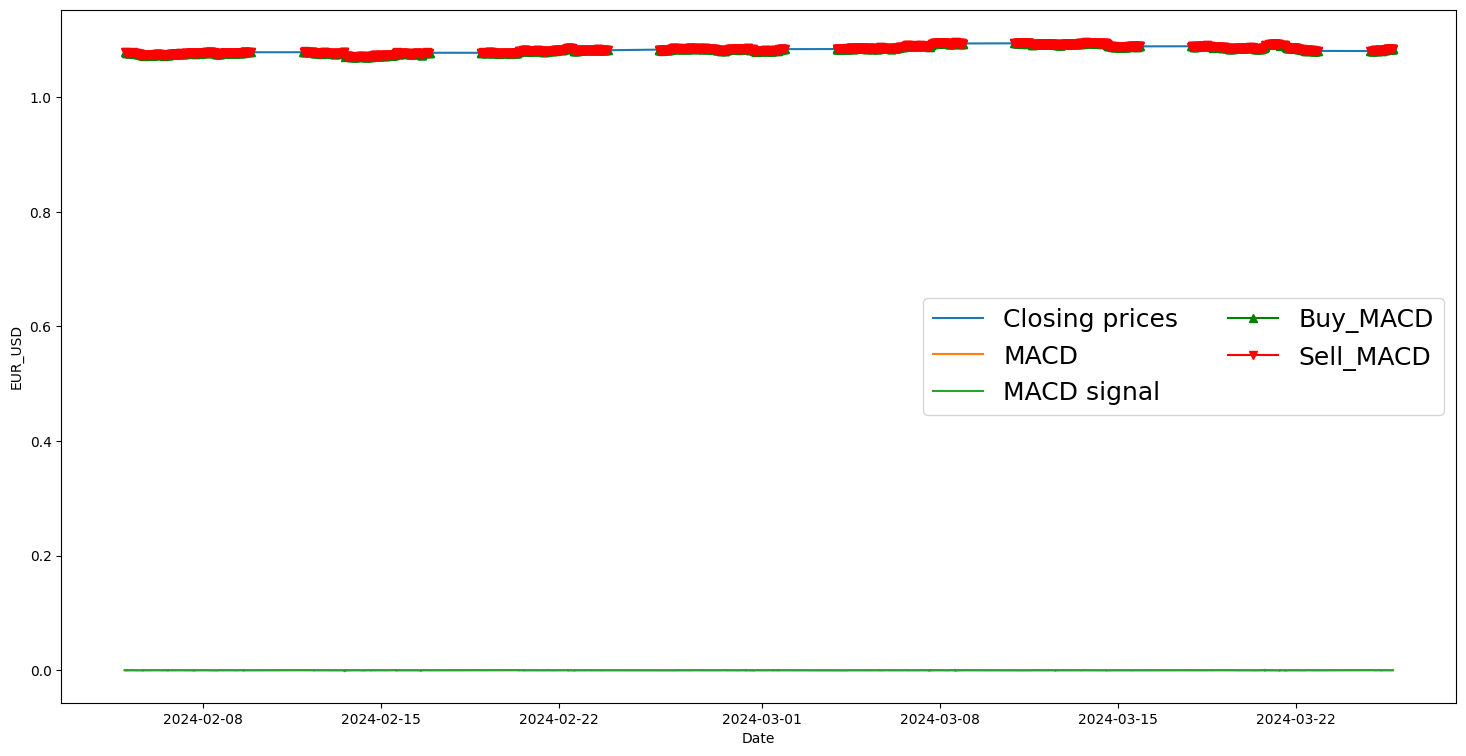

In [13]:
plt.figure(figsize = (18,9))

plt.plot(df["Close"], label = "Closing prices")
plt.plot(df["MACD"], label = "MACD")
plt.plot(df["MACD_SIGNAL"], label = "MACD signal")
plt.plot(df["Buy"], marker = "^", color = "green", label = "Buy_MACD")
plt.plot(df["Sell"], marker = "v", color = "red", label = "Sell_MACD")


plt.xlabel("Date")
plt.ylabel(symbol)
plt.legend(fontsize=18, ncols = 2)
# plt.savefig('MACD.png', format='png')
plt.show()